# Cluster analysis

Basic example showing how to carry out an analysis of the ClusterSpace.

In [1]:
import json
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from ase.build import bulk
from hiphive   import ClusterSpace

In [2]:
# Read the file in JSON format to a dictionary
with open(f'setup_variables.json', 'r') as json_file:
    setup_variables = json.load(json_file)

In [7]:
# Setup
tol         = 1e-4
fontsize    = 14
max_cutoffs = [10, 10, 7]
linewidth = 2
markersize = 9

In [4]:
# Load cluster space
cs = ClusterSpace.read(setup_variables['path_to_cluster_space'])
df = pd.DataFrame(cs.orbit_data)

### Collect number of orbits, clusters and parameters

In [5]:
parameter_data = {}
for order in cs.cutoffs.orders:
    parameter_data[order] = []
    cutoffs = sorted(set(df.loc[df.order == order, 'maximum_distance']))
    for cutoff in cutoffs:
        selection = f'maximum_distance < {cutoff+tol} and order == {order}'
        sub_orbits = df.query(selection)
        num_orbits = len(sub_orbits)
        num_clusters = sub_orbits.n_clusters.sum()
        num_params = sub_orbits.n_parameters.sum()
        parameter_data[order].append(
            [cutoff, num_orbits, num_clusters, num_params])
    parameter_data[order] = np.array(parameter_data[order])

### Plot results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


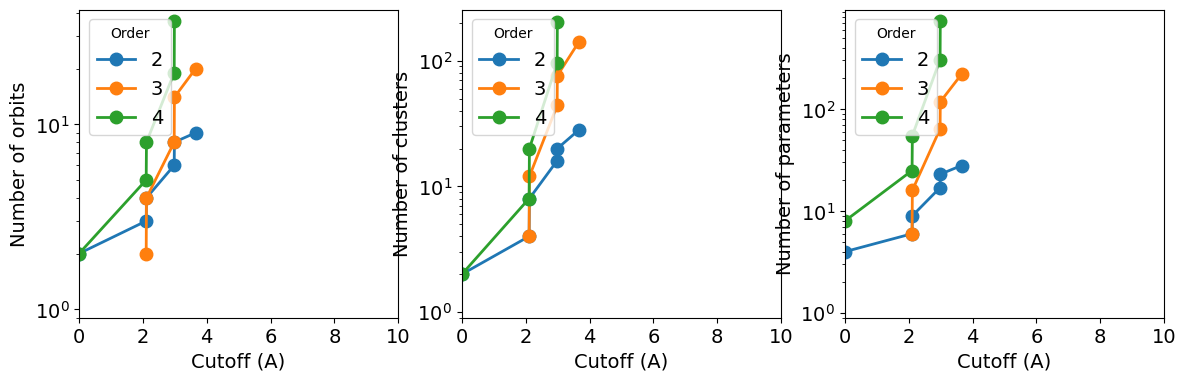

In [8]:
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
for i, ax in enumerate([ax1, ax2, ax3], start=1):
    for order, data in parameter_data.items():
        ax.semilogy(data[:, 0], data[:, i], '-o', markersize=markersize, linewidth=linewidth, label=order)
    ax.legend(loc=2, title='Order', fontsize=fontsize)
    ax.set_xlim([0.0, np.max(max_cutoffs)])
    ax.set_ylim(bottom=0.9)
    ax.set_xlabel('Cutoff (A)', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)

ax1.set_ylabel('Number of orbits',     fontsize=fontsize)
ax2.set_ylabel('Number of clusters',   fontsize=fontsize)
ax3.set_ylabel('Number of parameters', fontsize=fontsize)
plt.savefig('clusters.eps', dpi=50, bbox_inches='tight')